# Seaborn Heatmap
-  https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data    

In [2]:
# data
mtcars = data('mtcars')
iris = data('iris')
glue = sns.load_dataset('glue')

In [3]:
mtcars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [4]:
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [6]:
glue.head(2)

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3


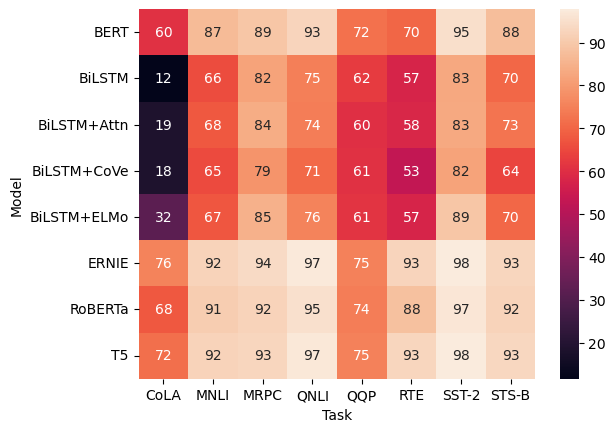

In [28]:
sns.heatmap(glue, annot=True)
plt.show()

In [29]:
glue.reset_index().head()

Task,Model,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
0,BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
1,BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
2,BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
3,BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
4,BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3


<Axes: xlabel='Task', ylabel='Model'>

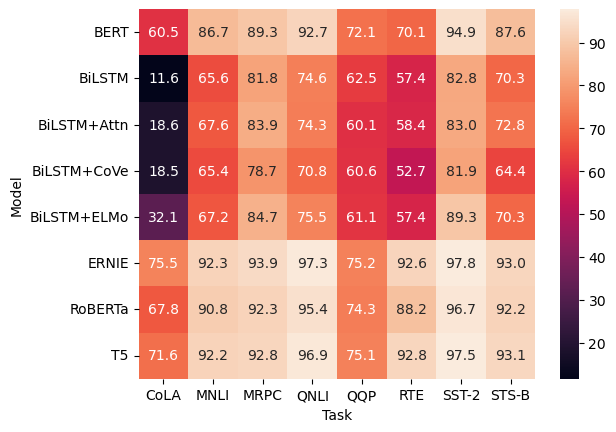

In [31]:
#decimal values, format values
sns.heatmap(glue, annot=True, fmt=".1f")

<Axes: xlabel='Task', ylabel='Model'>

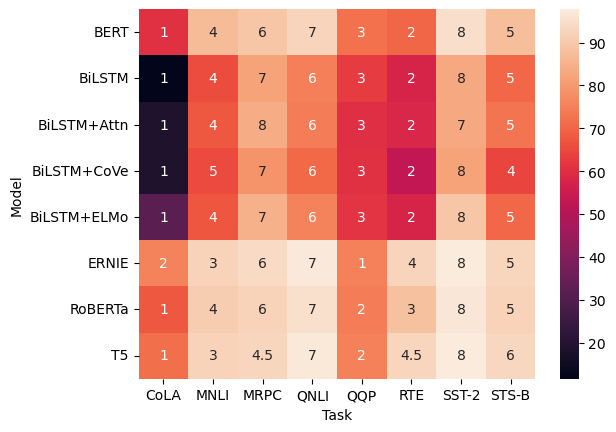

In [32]:
#Use a separate dataframe for the annotations: ???
sns.heatmap(glue, annot=glue.rank(axis="columns"))

<Axes: xlabel='Task', ylabel='Model'>

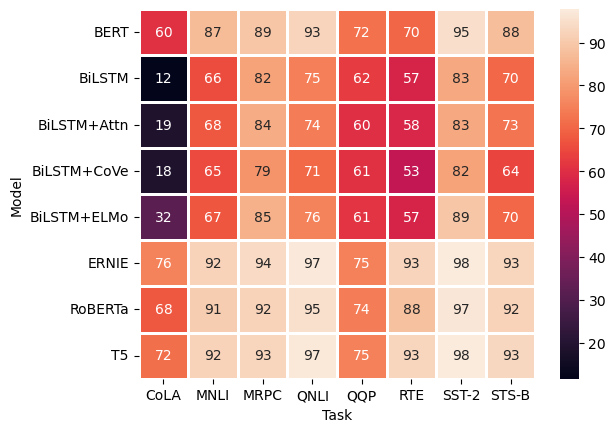

In [34]:
#Add lines between cells:
sns.heatmap(glue, annot=True, linewidth=1)

<Axes: xlabel='Task', ylabel='Model'>

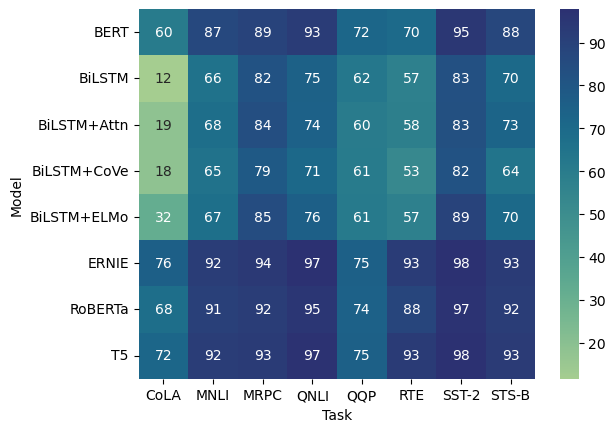

In [36]:
#Select a different colormap by name:
sns.heatmap(glue, cmap="crest", annot=True)

<Axes: xlabel='Task', ylabel='Model'>

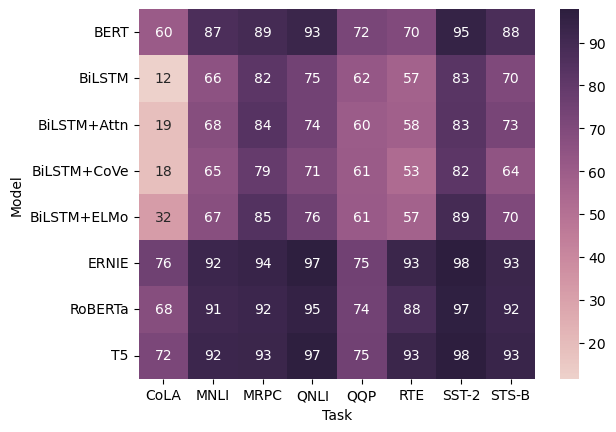

In [38]:
#Or pass a colormap object:
sns.heatmap(glue, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

Text(0.5, 1.0, 'SNS Heatmap')

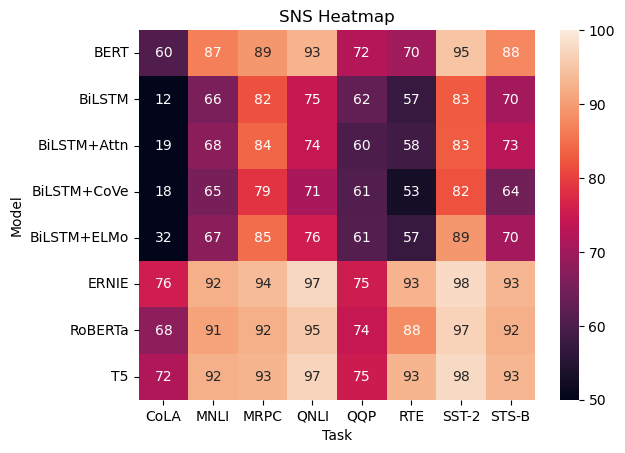

In [42]:
#Set the colormap norm (data values corresponding to minimum and maximum points):
sns.heatmap(glue, vmin=50, vmax=100, annot=True).set_title('SNS Heatmap')

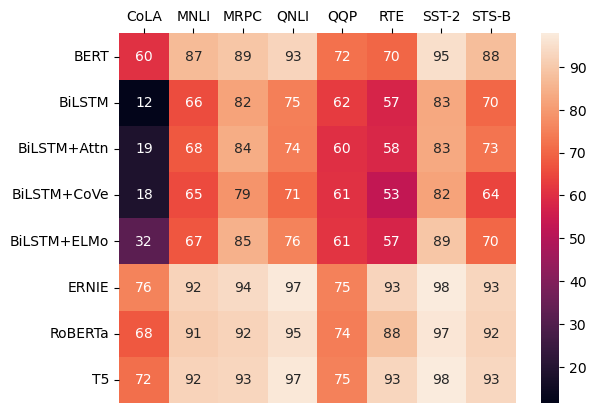

In [41]:
#Use methods on the matplotlib.axes.Axes object to tweak the plot:
ax = sns.heatmap(glue, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# end here

glue.pivot_table(index='Model', columns='Task')
glue2 = glue.reset_index().melt(id_vars=['Model'], value_vars=['CoLA'], var_name='Task', value_name='value').set_index('Model')
glue2.head()